In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
inspector = inspect(engine)

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [22]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.

# result = session.query(measurement,func.max(measurement.date))
# for row, i in result:
#     print(row.date,row.id)

most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
most_recent_date

'2017-08-23'

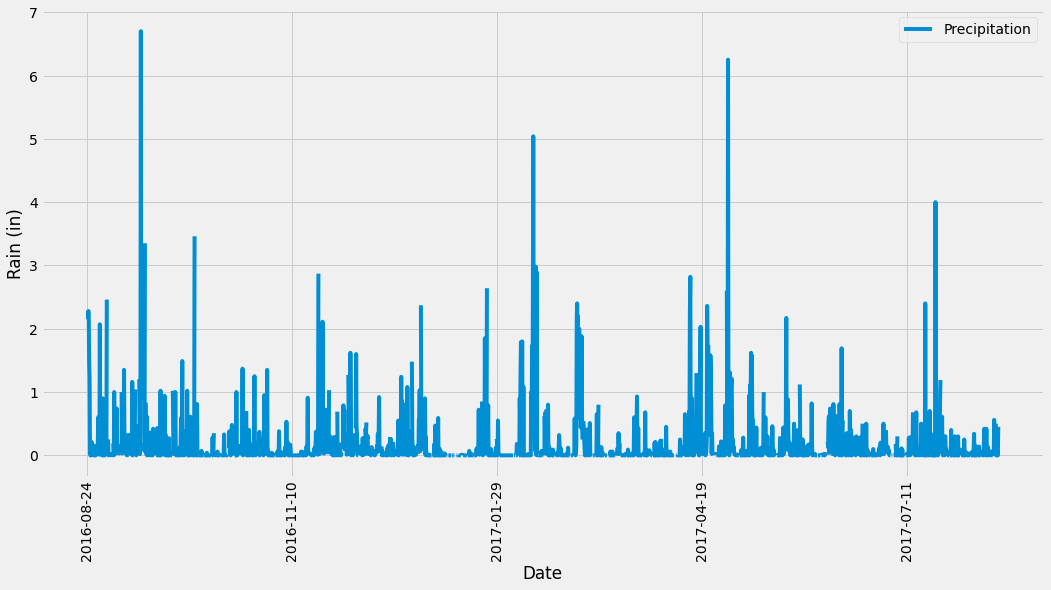

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
one_year_ago

# Perform a query to retrieve the data and precipitation scores
prcp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago).all()
prcp

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp, columns=["Date", "Prcp"])
prcp_df.set_index("Date")
prcp_df.dropna()
prcp_df


# Sort the dataframe by date
sorted_prcp_df = prcp_df.sort_values(by=["Date"])
sorted_prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
sorted_prcp_df.plot("Date", "Prcp", rot=90, figsize=(16, 8))
plt.xlabel("Date")
plt.ylabel("Rain (in)")
plt.legend(["Precipitation"])
plt.savefig("Resources/prcp_plot.png", dpi=150)
plt.show()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_prcp_df.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number stations in the dataset

# for station in inspector.get_table_names():
#     for column in inspector.get_columns(station):
#         print("Column: %s" % column["name"])

total_stations = session.query(station.station).count()
total_stations

9

In [32]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_max_mean = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()
min_max_mean

[(54.0, 85.0, 71.66378066378067)]

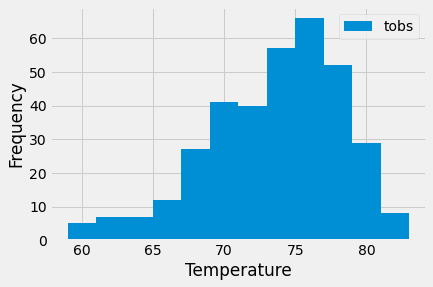

In [61]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_tobs = session.query(measurement.date, measurement.tobs).filter(measurement.date >= one_year_ago, measurement.station == "USC00519281").all()

one_year_tobs_df = pd.DataFrame(one_year_tobs, columns=["Date", "Temp"])
one_year_tobs_df.set_index("Date")
one_year_tobs_df.dropna()
one_year_tobs_df

plt.hist(one_year_tobs_df['Temp'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.savefig("Resources/temp_hist.png", dpi=150)
plt.show()

# Close session

In [62]:
# Close Session
session.close()